# Simple Linear Regression

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("Income_Data.csv")
X = dataset.iloc[ : , 0:-1 ].values
y = dataset.iloc[ : , -1 ].values

# Splitting the dataset into the training set and the test set
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the simple linear regression model on the training set

In [2]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the test set results

In [3]:
print(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [4]:
print(y_test)

[ 37731 122391  57081  63218 116969 109431]


In [5]:
y_pred = regressor.predict(X_test)

In [6]:
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


## Predicting new data

In [7]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

In [8]:
y_pred = regressor.predict(([[10]]))

In [9]:
print(y_pred)

[119905.85041792]


## Visualizing the training set results

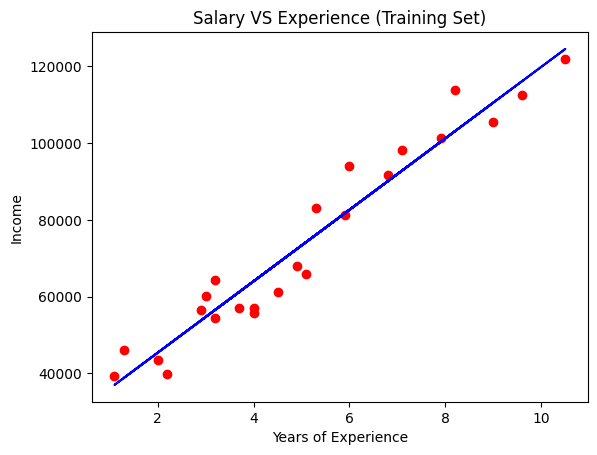

In [10]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary VS Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.show()

## Visualizing the test set results

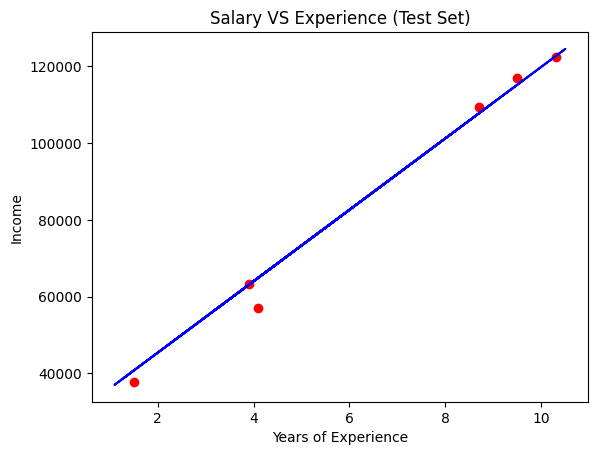

In [11]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary VS Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.show()

## Building the equation for the simple linear regression

In [12]:
intercept = regressor.intercept_
coefficient = regressor.coef_

In [13]:
print('Intercept = ', intercept)
print('Coefficient = ', coefficient)

Intercept =  26780.09915062818
Coefficient =  [9312.57512673]


Hence, the equation is:

Income = Intercept + Coefficient * Experience

Income = 26780.09 + 9312.57 * Experience

## Statistical Significance of the Model

In [14]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     352.1
Date:                Sun, 18 Jun 2023   Prob (F-statistic):           5.03e-15
Time:                        08:34:25   Log-Likelihood:                -242.89
No. Observations:                  24   AIC:                             489.8
Df Residuals:                      22   BIC:                             492.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.678e+04   2818.687      9.501      0.000    2.09e+04    3.26e+04
x1          9312.5751    496.279     18.765      0.000    8283.355    1.03e+04
==============================================================================
Omnibus:                        3.105   Durbin-Watson:                   2.608
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                1.567
Skew:                           0.297   Prob(JB):                        0.457
Kurtosis:                       1.898   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""